# An Access-Control Queuing Task

This is a decision task involving access control to a set of 10 servers. Customers of 4 different priorities arrive at a single queue.
- If given access to a server, the customers pay a reward of 1, 2, 4, or 8 to the server, depending on their priority, with higher priority customers paying more.
- In each time step, the customer at the head of the queue is either:
  - accepted (assigned to one of the servers)
  - or rejected (removed from the queue, with a reward of 0).
- In either case, on the next time step the next customer in the queue is considered.
- The queue never empties, and the priorities of the customers in the queue are uniformly randomly distributed.
- Of course a customer cannot be served if there is no free server; the customer is always rejected in this case.
- Each busy server becomes free with probability $p=0.06$ on each time step.

Although we have just described them for definiteness, let us assume the statistics of arrivals and departures are unknown.
- The task is to decide on each step whether to accept or reject the next customer, on the basis of his priority and the number
 of free servers, to maximize long-term reward without discounting.

In this example we consider a tabular solution to this problem.
- Although there is no generalization between states, we can still consider it in the general function approximation setting as this setting generalizes the tabular setting.
- Thus, we have a differential action-value estimate for each pair of state (number of free servers and priority of the customer at the head of the queue) and action (accept or reject).
- Figure 10.5 shows the solution found by differential semi-gradient SARSA with parameters $\alpha=0.01, \beta=0.01, \varepsilon=0.1$.
- The initial action values and $\bar{R}$ were 0.

In [1]:
from IPython.display import Image

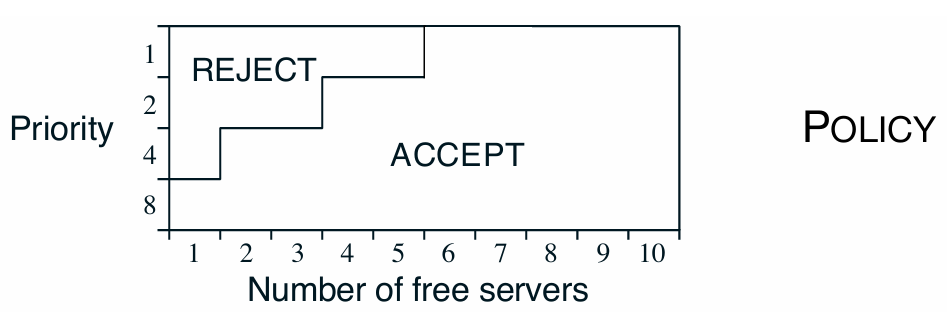

In [2]:
Image(filename="../book_images/Figure_10_5_1.PNG")

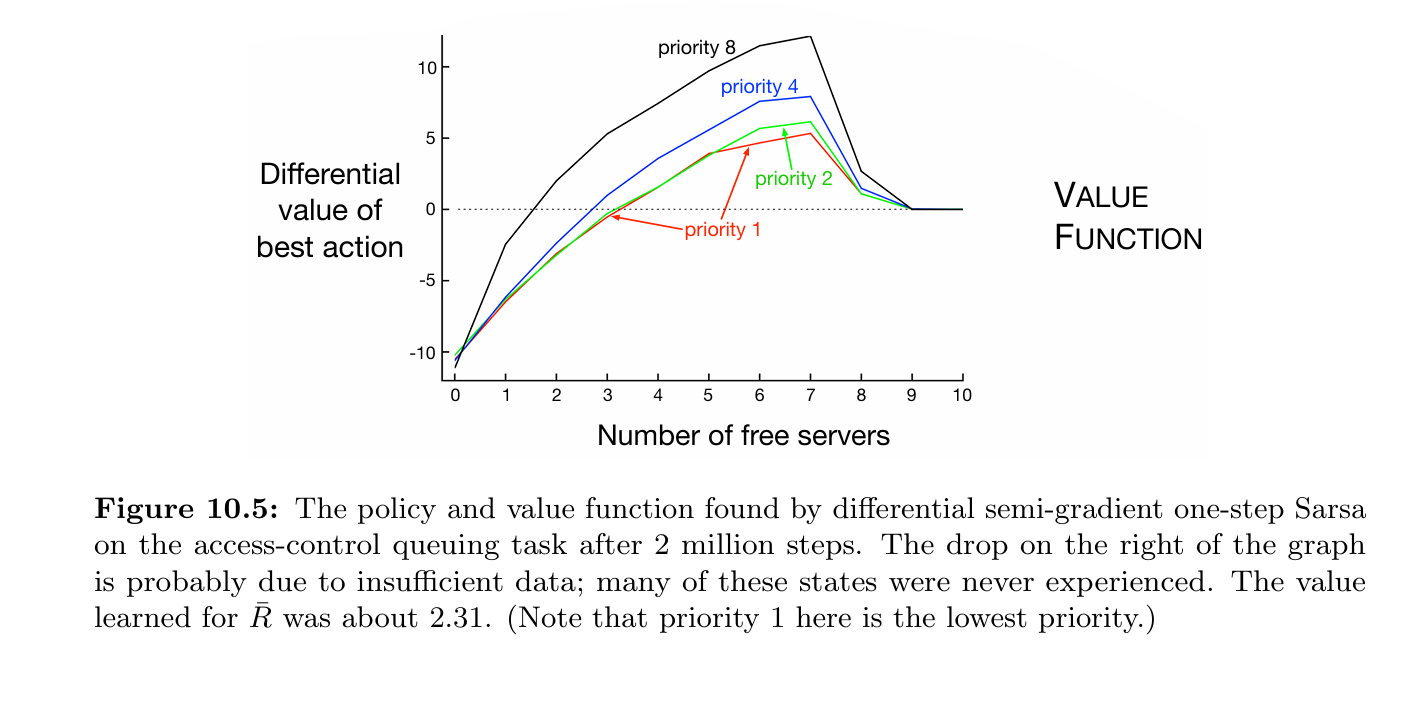

In [3]:
Image(filename="../book_images/Figure_10_5_2.PNG")

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.use('Agg')

In [6]:
from src.access_control import ValueFunction, differential_semi_gradient_sarsa, priorities, number_of_servers, rewards, actions

In [7]:
# Use tile coding with 8 tilings
num_of_tilings = 8

# Initialize VF
value_function = ValueFunction(num_of_tilings)

# Maximum steps
max_steps = int(1e6)

In [8]:
# Differential semi-gradient SARSA
differential_semi_gradient_sarsa(value_function, max_steps)

100%|██████████| 1000000/1000000 [01:32<00:00, 10869.04it/s]

Frequency of number free servers: [1.29568e-01 2.31537e-01 2.70581e-01 2.12387e-01 1.09646e-01 3.71460e-02
 7.96600e-03 1.06000e-03 9.80000e-05 9.00000e-06 2.00000e-06]


In [9]:
# Initialize state-values with 0s
state_values = np.zeros((len(priorities), number_of_servers + 1))

In [10]:
# For every priority
for priority in priorities:
    # for evert free server
    for free_servers in range(number_of_servers + 1):
        # calculate state-values
        state_values[priority, free_servers] = value_function.state_value(free_servers, priority)

In [11]:
# Plotting 1st subplot
fig = plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)

<Axes: >

In [12]:
for priority in priorities:
    plt.plot(range(number_of_servers + 1), state_values[priority, :], label='priority %d' % (rewards[priority]))

In [13]:
plt.xlabel("Number of free servers")
plt.ylabel("Differential value of best action")
plt.legend()

In [14]:
# Plotting 2nd subplot
ax = fig.add_subplot(2, 1, 2)

# Initialize policy with 0s
policy = np.zeros((len(priorities), number_of_servers + 1))

In [15]:
# For every priority
for priority in priorities:
    # for every free server
    for free_servers in range(number_of_servers + 1):
        # calculate state-values
        state_values = [value_function.state_action_value(free_servers, priority, action)
                        for action in list(actions.values())]
        
        # if there are no free servers
        if free_servers == 0:
            # reject customer
            policy[priority, free_servers] = actions["reject"]
        
        else:
            # 
            policy[priority, free_servers] = np.argmax(state_values)

In [16]:
fig = sns.heatmap(policy, cmap="YlGnBu", ax=ax, xticklabels=range(number_of_servers + 1), yticklabels=priorities)
fig.set_title("Policy (0 Reject, 1 Accept)")
fig.set_xlabel("Number of free servers")
fig.set_ylabel("Priority")

Text(95.72222222222221, 0.5, 'Priority')

In [17]:
plt.savefig("../generated_images/figure_10_5.png")
plt.close()